In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from time import time
%matplotlib inline

# 1. Inspecting data

In [2]:
dataset = pd.read_csv("income_evaluation.csv")
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are two types of data: categorical and numerical.

In [4]:
dataset.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

There are some '-' and ' ' on the left-side of column names, we need to clean them.

# 2. Cleaning data

In [5]:
dataset.columns = list(map(lambda x: x.lstrip(), dataset.columns))


In [6]:
dataset.columns = dataset.columns.str.replace('-', '_')
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
dataset.shape

(32561, 15)

In [8]:
#drop education since it is same as education_num
dataset.drop(['education'],axis=1,inplace=True)
dataset.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Separating categorical and numerical data:

In [9]:
numeric = []
character = []

for column in dataset.columns:
    if dataset[column].dtype !='object':
        numeric.append(column)
    else:
        character.append(column)
        
print(numeric)
print(character)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Search any missing values:

In [10]:
#clean columns with ? mark to nan value
for column in dataset.columns:
    dataset[column].replace(' ?', np.NaN, inplace=True)

In [11]:
dataset.isnull().sum().sort_values(ascending = False)

occupation        1843
workclass         1836
native_country     583
age                  0
fnlwgt               0
education_num        0
marital_status       0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
income               0
dtype: int64

'Occupation', 'Workclass' and 'native-country' include NaN, replacing them with mode value.

In [12]:
dataset["occupation"].fillna(dataset["occupation"].mode()[0],inplace=True)
dataset["workclass"].fillna(dataset["workclass"].mode()[0],inplace=True)
dataset["native_country"].fillna(dataset["native_country"].mode()[0],inplace=True)

In [13]:
dataset.isnull().sum().sort_values(ascending = False)

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Now, there is no null value.

Check and clean any duplicate values:

In [14]:
print(dataset.duplicated().sum())
display(dataset.loc[dataset.duplicated()].head())

24


,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [15]:
#Remove duplicates:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

# 3. Statistical Analysis

# 3.1 Numerical Data Statistical Analysis:

In [18]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education_num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital_gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital_loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


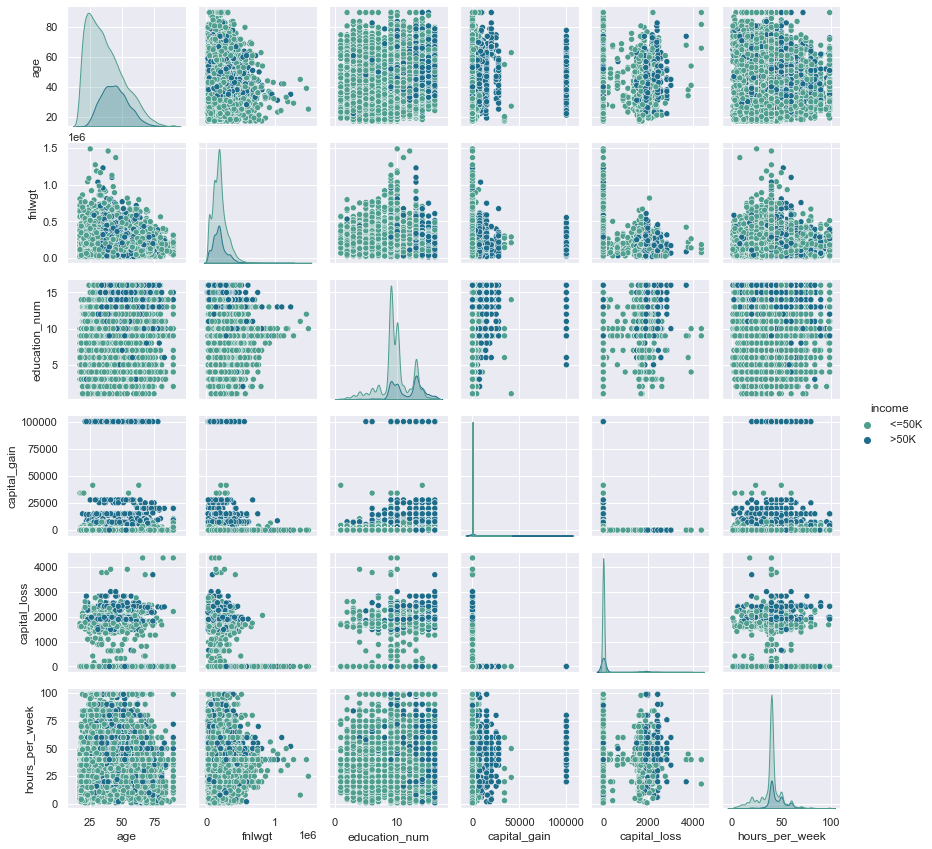

In [19]:
sns.set(style="darkgrid")
sns.pairplot(dataset, hue = 'income', palette = 'crest',height=2)

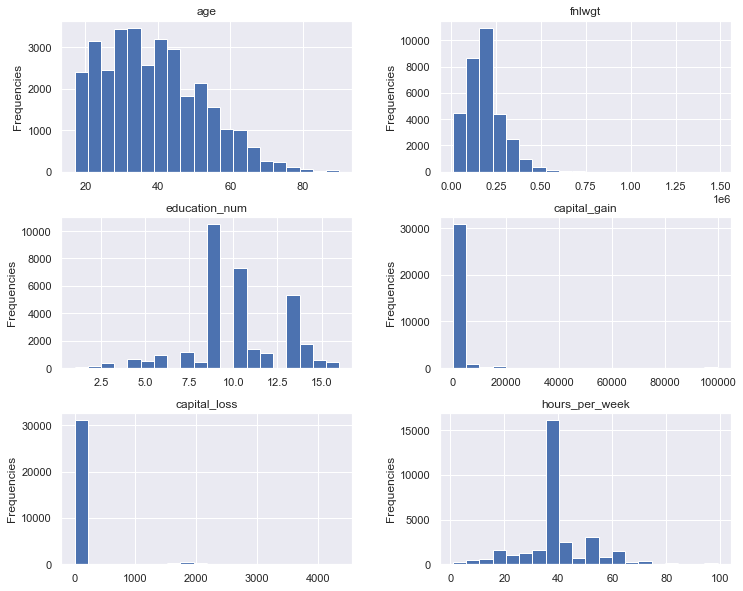

In [20]:
# histograms for each numeric data

hists = dataset.hist(numeric,figsize=(12, 10), bins=20,)
for hist in hists.flatten():
    hist.set_ylabel('Frequencies')

plt.show()

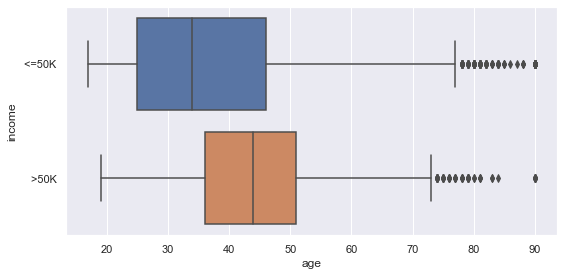

In [21]:
fig, axs=plt.subplots(1,1,figsize=(8,4))
axs = sns.boxplot(x=dataset["age"],y=dataset['income'])
plt.tight_layout()
plt.show()

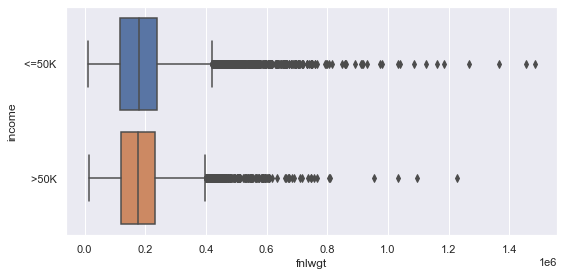

In [22]:
fig, axs=plt.subplots(1,1,figsize=(8,4))
axs = sns.boxplot(x=dataset["fnlwgt"],y=dataset['income'])
plt.tight_layout()
plt.show()

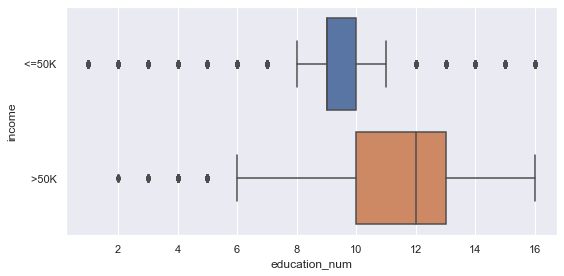

In [23]:
fig, axs=plt.subplots(1,1,figsize=(8,4))
axs = sns.boxplot(x=dataset["education_num"],y=dataset['income'])
plt.tight_layout()
plt.show()

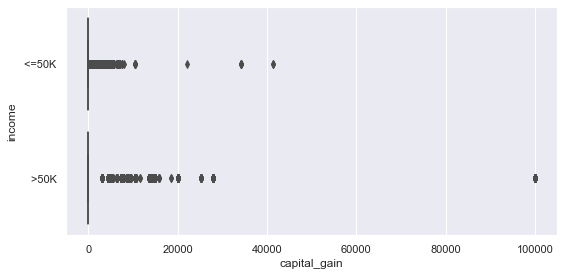

In [24]:
fig, axs=plt.subplots(1,1,figsize=(8,4))
axs = sns.boxplot(x=dataset["capital_gain"],y=dataset['income'])
plt.tight_layout()
plt.show()

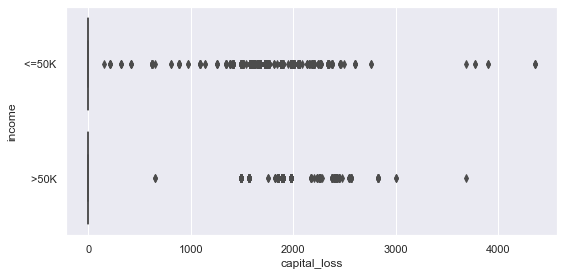

In [25]:
fig, axs=plt.subplots(1,1,figsize=(8,4))
axs = sns.boxplot(x=dataset["capital_loss"],y=dataset['income'])
plt.tight_layout()
plt.show()

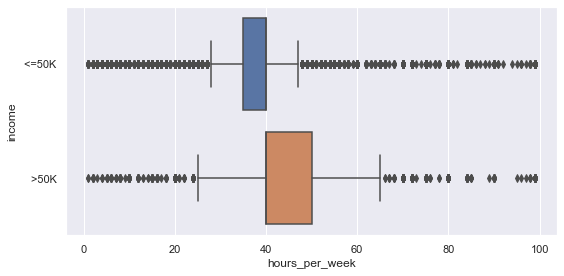

In [26]:
fig, axs=plt.subplots(1,1,figsize=(8,4))
axs = sns.boxplot(x=dataset["hours_per_week"],y=dataset['income'])
plt.tight_layout()
plt.show()

# 3.2 Categorical Data Statistical Analysis:

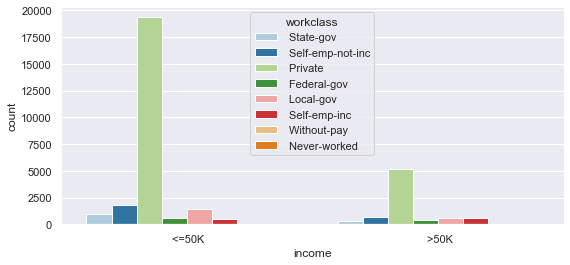

In [27]:
fig, axs = plt.subplots(1,1,figsize=(9,4))
axs = sns.countplot(x="income", hue=character[0], data=dataset, palette='Paired')
plt.show()

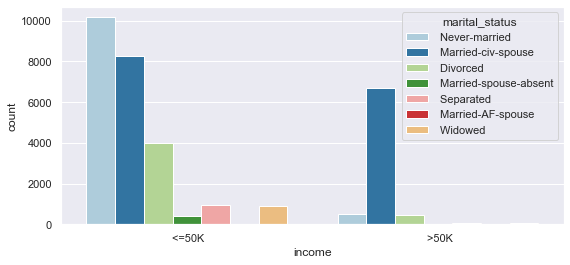

In [28]:
fig, axs = plt.subplots(1,1,figsize=(9,4))
axs = sns.countplot(x="income", hue=character[1], data=dataset, palette='Paired')
plt.show()

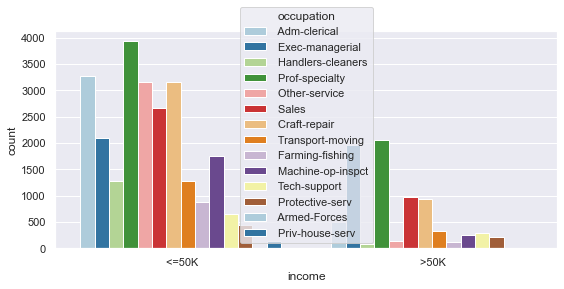

In [29]:
fig, axs = plt.subplots(1,1,figsize=(9,4))
axs = sns.countplot(x="income", hue=character[2], data=dataset, palette='Paired')
plt.show()

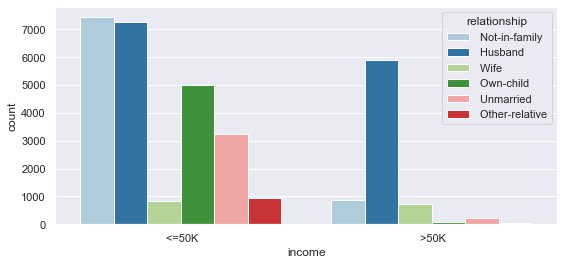

In [30]:
fig, axs = plt.subplots(1,1,figsize=(9,4))
axs = sns.countplot(x="income", hue=character[3], data=dataset, palette='Paired')
plt.show()

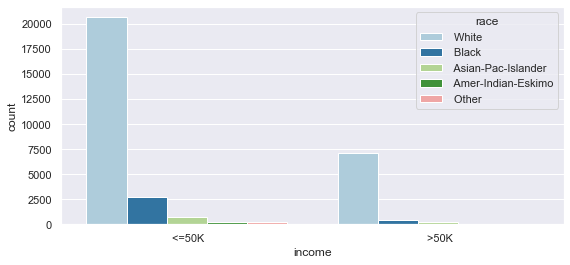

In [31]:
fig, axs = plt.subplots(1,1,figsize=(9,4))
axs = sns.countplot(x="income", hue=character[4], data=dataset, palette='Paired')
plt.show()

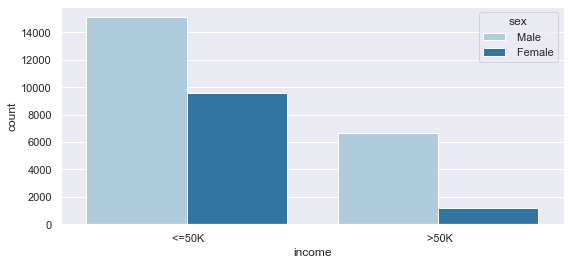

In [32]:
fig, axs = plt.subplots(1,1,figsize=(9,4))
axs = sns.countplot(x="income", hue=character[5], data=dataset, palette='Paired')
plt.show()

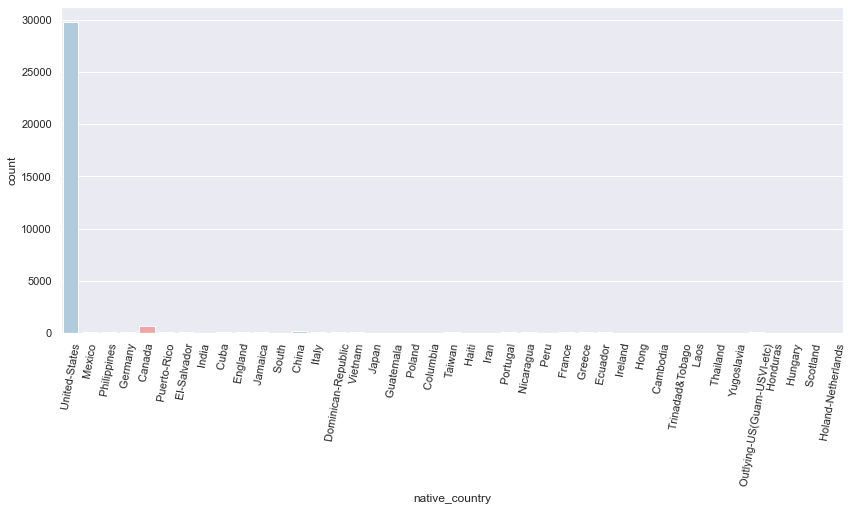

In [33]:
fig, axs = plt.subplots(1,1,figsize=(14,6))
axs = sns.countplot(x="native_country", data=dataset, palette='Paired')
axs.set_xticklabels(dataset.native_country.value_counts().index, rotation=80)
plt.show()

# 3.3 Inspecting income variable:

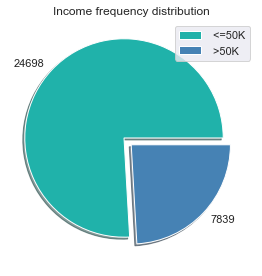

In [34]:
colors = ['#20B2AA', '#4682B4']
counts =dataset['income'].value_counts()
explode = [0.1, 0]
plt.pie(counts, labels = counts.values, colors=colors, explode = explode, shadow=True)
plt.title('Income frequency distribution')
plt.legend(labels=counts.index)
plt.tight_layout() 
plt.show()

# 4. Data Transformation & Data Reduction

# 4.1 Label Encoding

In [16]:
dataset['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
dataset['income']=dataset['income'].replace((' <=50K',' >50K'),(0,1))
dataset.tail()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [24]:
from sklearn.preprocessing import LabelEncoder
for column in dataset.columns:
    if dataset[column].dtypes == 'object':
        label_encoder = LabelEncoder()
        dataset[column] = label_encoder.fit_transform(dataset[column].astype(str))
X_full = dataset.drop(['income'], axis=1)
X_full

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,6,77516,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,9,4,0,3,4,1,0,0,20,38


# 4.2 Outliers

In [25]:
from scipy.stats import zscore
zabs = np.abs(zscore(dataset.loc[:,'age':'native_country']))
print(np.shape(np.where(zabs >= 3)))

(2, 5281)


In [29]:
new_dataset = dataset[(zabs < 3).all(axis = 1)]
new_dataset

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,7,2,5,0,2,1,0,0,40,38,0
5,37,3,284582,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,9,4,0,3,4,1,0,0,20,38,0


# 4.3 Feature Importance and Feature Seleaction

In [31]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [32]:
X_full = new_dataset.drop(['income'], axis=1)
y_full =new_dataset.loc[:,'income']

scaler = MinMaxScaler()
scaler.fit(X_full)
X_new = scaler.transform(X_full)

# To make the skewed income data balanced
ros = RandomOverSampler(random_state=42)
ros.fit(X_new,y_full)

X_new_ros,y_new_ros = ros.fit_resample(X_new, y_full)
y_new_ros.value_counts(normalize=True)

#train test dataset split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_ros, y_new_ros, test_size=0.3, random_state=42)

In [33]:
def plot_feature_importances(importance,feature_names,classifier_name):

    #importance and feature_names into numpy arrays
    fi = np.array(importance)
    fi_names = np.array(feature_names)

    #feature importance and feature_names into pandas dataframe
    fi_dict={'feature_names':fi_names,'feature_importance':fi}
    df_fi = pd.DataFrame(fi_dict)

    #Sort feature importance indescending order
    df_fi.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(8,6))
    #Plot a seaborn barchart for feature imporatance
    sns.barplot(x=df_fi['feature_importance'], y=df_fi['feature_names'], palette = "tab10")
    plt.title(classifier_name + ' Feature Importance', fontsize = 14)
    plt.xlabel('Feature Importance \n Figure 2', fontsize = 12)
    plt.ylabel('Feature Names', fontsize = 12)

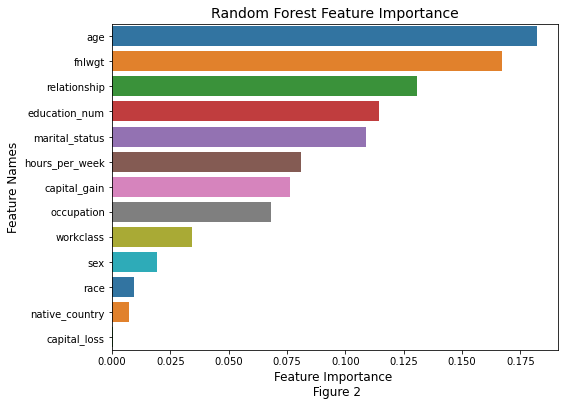

In [34]:
rf_full = RandomForestClassifier()
rf_full.fit(X_train_new, y_train_new)
plot_feature_importances(rf_full.feature_importances_,X_full.columns,'Random Forest')

In [35]:
X =new_dataset.drop(["race","capital_loss","native_country", "income"], axis=1)
y =new_dataset.loc[:,'income']

# 4.3 Normalise the Data

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

# 4.4 Balance Skewed Data

In [37]:
y.value_counts(normalize=True)

0    0.775728
1    0.224272
Name: income, dtype: float64

In [38]:
ros2 = RandomOverSampler(random_state=42)
ros2.fit(X_norm,y)

RandomOverSampler(random_state=42)

In [39]:
X_ros,y_ros = ros2.fit_resample(X_norm, y)
y_ros.value_counts(normalize=True)

0    0.5
1    0.5
Name: income, dtype: float64

# 5. Fine Tune Grid Search

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [41]:
#train test dataset split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42)

# 5.1 SVM:

In [42]:
#hyper parameters for SVM
svm_param = {'C':[1, 10, 100, 1000],'gamma':[100,10,1,0.1,0.01,0.001]}

#Using grid-search to tune hyperparameters for SVM
svm_gs = GridSearchCV(SVC(), svm_param, cv=5)
svm_gs.fit(X_train, y_train)

#print out result in a dataframe
svm_gs_df = pd.DataFrame(svm_gs.cv_results_)
svm_gs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,43.062997,1.325857,6.906050,0.019315,1,100,"{'C': 1, 'gamma': 100}",0.889350,0.887857,0.890179,0.893829,0.890493,0.890341,0.001968,4
1,17.248025,1.299433,4.149718,0.009439,1,10,"{'C': 1, 'gamma': 10}",0.844227,0.840411,0.842236,0.841075,0.844035,0.842397,0.001533,8
2,9.939278,0.298544,3.865903,0.039197,1,1,"{'C': 1, 'gamma': 1}",0.814532,0.817518,0.819343,0.815196,0.812676,0.815853,0.002333,13
3,10.582126,0.060215,4.460198,0.021329,1,0.1,"{'C': 1, 'gamma': 0.1}",0.804247,0.807565,0.811712,0.804247,0.806039,0.806762,0.002768,18
4,13.431731,0.243925,5.393114,0.028834,1,0.01,"{'C': 1, 'gamma': 0.01}",0.763106,0.769741,0.775216,0.763935,0.770367,0.768473,0.004474,22


# 5.2 KNN

In [43]:
#hyper parameters for KNN
knn_param = {'n_neighbors':[1,3,5,7,9,11,13,15,17,20], 'p':[1,2]}

#Using grid-search to tune hyperparameters for KNN
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_param, cv=5)
knn_gs.fit(X_train, y_train)

#print out result in a dataframe
knn_gs_df = pd.DataFrame(knn_gs.cv_results_)
knn_gs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027656,0.001291,0.193747,0.001382,1,1,"{'n_neighbors': 1, 'p': 1}",0.886530,0.886530,0.890013,0.893995,0.885847,0.888583,0.003074,1
1,0.028229,0.000391,0.191327,0.001969,1,2,"{'n_neighbors': 1, 'p': 2}",0.886032,0.886530,0.890013,0.891009,0.885349,0.887787,0.002278,2
2,0.027870,0.000697,0.263441,0.002493,3,1,"{'n_neighbors': 3, 'p': 1}",0.844393,0.841241,0.847711,0.846715,0.837232,0.843458,0.003827,3
3,0.027563,0.000732,0.247609,0.005522,3,2,"{'n_neighbors': 3, 'p': 2}",0.839748,0.840577,0.842900,0.846549,0.838892,0.841733,0.002754,4
4,0.027704,0.001017,0.304626,0.004573,5,1,"{'n_neighbors': 5, 'p': 1}",0.827804,0.829131,0.829131,0.825979,0.823129,0.827035,0.002269,5


# 5.3 Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

#hyper parameters for logistic regression
lr_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2', 'elasticnet', 'none']}

#Using grid-search to tune hyperparameters for logistic regression
lr_gs = GridSearchCV(LogisticRegression(max_iter = 500, solver = 'saga'), lr_param, cv=5)
lr_gs.fit(X_train, y_train)

#inspect the grid search cross_validation result
lr_gs_df = pd.DataFrame(lr_gs.cv_results_)
lr_gs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061219,0.006199,0.001171,0.000926,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.614798,0.623424,0.628567,0.613305,0.624357,0.620890,0.005866,21
1,0.067618,0.004339,0.000604,0.000494,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.729595,0.741374,0.741871,0.734406,0.740003,0.737450,0.004742,20
2,0.001021,0.000061,0.000000,0.000000,0.001,elasticnet,"{'C': 0.001, 'penalty': 'elasticnet'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
3,0.062407,0.005055,0.000614,0.000502,0.001,none,"{'C': 0.001, 'penalty': 'none'}",0.765096,0.767253,0.777206,0.757465,0.762403,0.765885,0.006537,2
4,0.076675,0.006990,0.000712,0.000378,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.759290,0.760119,0.771068,0.757465,0.760577,0.761704,0.004801,19


# 5.4 Random Forest

In [45]:
#hyper parameters for Random Forest
max_depth = [int(x) for x in np.linspace(start = 40, stop = 200, num=20)]
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 200, num=20)]

rf_param = {
    'max_depth': max_depth,
    'n_estimators': n_estimators,
}
#Using grid-search to tune hyperparameters for random forest
rf_gs = GridSearchCV(RandomForestClassifier(), rf_param, cv=5)
rf_gs.fit(X_train, y_train)

#inspect the grid search cross_validation result
rf_gs_df = pd.DataFrame(rf_gs.cv_results_)
rf_gs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.553824,0.010647,0.033046,0.000650,40,40,"{'max_depth': 40, 'n_estimators': 40}",0.913072,0.908096,0.912906,0.916390,0.906753,0.911443,0.003535,132
1,0.659272,0.004713,0.040202,0.000953,40,48,"{'max_depth': 40, 'n_estimators': 48}",0.913072,0.906768,0.913570,0.916390,0.907748,0.911510,0.003664,106
2,0.772445,0.006357,0.046172,0.000895,40,56,"{'max_depth': 40, 'n_estimators': 56}",0.915229,0.909257,0.911745,0.915063,0.907085,0.911676,0.003195,79
3,0.893524,0.008030,0.052925,0.000557,40,65,"{'max_depth': 40, 'n_estimators': 65}",0.910584,0.906105,0.908925,0.916224,0.905260,0.909420,0.003904,399
4,1.003231,0.003761,0.059348,0.000211,40,73,"{'max_depth': 40, 'n_estimators': 73}",0.910750,0.907598,0.910916,0.915229,0.904430,0.909784,0.003614,388


# 6. Evaluate Models

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
NUM_TRAIN_SETS = 10
NUM_SAMPLES = 10

def subsample(X, y, sample_size):
    xy_tuples = list(zip(X, y))
    xy_sample = [random.choice(xy_tuples) for _ in range(sample_size)]
    X_sample, y_sample = zip(*xy_sample)
    return X_sample, y_sample

def error(clf, X, y):
    "Calculate error as 1-accuracy"
    return 1-clf.score(X,y)

def bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size, num_samples=NUM_SAMPLES):
    train_errors = []
    test_errors = []
    for _ in range(num_samples):
        X_sample, y_sample = subsample(X_train, y_train, sample_size)
        clf.fit(X_sample, y_sample)
        train_errors.append(error(clf,X_sample,y_sample))
        test_errors.append(error(clf,X_test,y_test))
    train_error = sum(train_errors)/len(train_errors)
    test_error = sum(test_errors)/len(test_errors)
    return train_error, test_error

def plot_error_curves(clf, X_train, y_train, X_test, y_test, num_train_sets=NUM_TRAIN_SETS, title=None):
    data_sizes = []
    train_errors = []
    test_errors = []
    for i in range(num_train_sets):
        sample_size = int(len(y_train) * (i+1)/num_train_sets)
        train_error, test_error = bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size)
        data_sizes.append(sample_size)
        train_errors.append(train_error)
        test_errors.append(test_error)
    plt.plot(data_sizes, train_errors, c='b', label='Training error')
    plt.plot(data_sizes, test_errors, c='r', label='Generalisation error')
    plt.ylim(0,1)
    plt.ylabel('Error')
    plt.xlabel('Number of training samples')
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

In [47]:
from time import time
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

def run_evaluate_model (model_grid_search, X_train, y_train, X_test, y_test, verbose = True, model_name =None):
    
    print(model_name +' Best parameters: {}'.format(model_grid_search.best_params_))
    print(model_name +' Best score: {} \n'.format(model_grid_search.best_score_))
    
    start_time = time()
    model = model_grid_search.best_estimator_
    model.fit(X_train, y_train)
    
    print(model_name +' Classification report: (0=income <=50K , 1=income > 50K):\n')
    print(classification_report(y_test, model.predict(X_test)))
    
    print(model_name +' Accuracy score:', round(accuracy_score(y_test, model.predict(X_test)) * 100, 3))
    print(model_name +' F1 Score: ', round(f1_score(y_test, model.predict(X_test)) * 100,3))
    print(model_name +' RunningTime: %.2fs\n' % (time() - start_time))
    
    plt.figure(figsize=(6,4))
    model_cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(model_cm,fmt="d",annot=True, cmap = "Blues")
    plt.title(model_name +' Confusion Matrix: (0=income <=50K , 1=income > 50K)')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    plot_error_curves(model, X_train, y_train, X_test, y_test, title=model_name)

SVM Best parameters: {'C': 1000, 'gamma': 100}
SVM Best score: 0.9009589340777824 

SVM Classification report: (0=income <=50K , 1=income > 50K):

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      6404
           1       0.91      0.94      0.92      6513

    accuracy                           0.92     12917
   macro avg       0.92      0.92      0.92     12917
weighted avg       0.92      0.92      0.92     12917

SVM Accuracy score: 91.949
SVM F1 Score:  92.157
SVM RunningTime: 163.84s



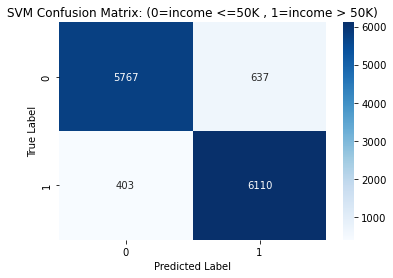

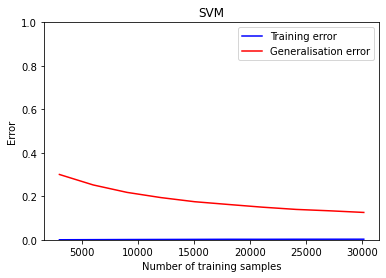

In [48]:
run_evaluate_model(svm_gs, X_train, y_train, X_test, y_test, model_name = 'SVM')

KNN Best parameters: {'n_neighbors': 1, 'p': 1}
KNN Best score: 0.8885828084612386 

KNN Classification report: (0=income <=50K , 1=income > 50K):

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      6404
           1       0.87      0.96      0.91      6513

    accuracy                           0.91     12917
   macro avg       0.91      0.91      0.91     12917
weighted avg       0.91      0.91      0.91     12917

KNN Accuracy score: 90.648
KNN F1 Score:  91.198
KNN RunningTime: 1.44s



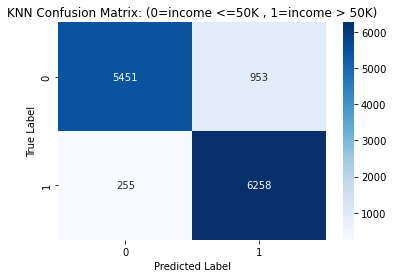

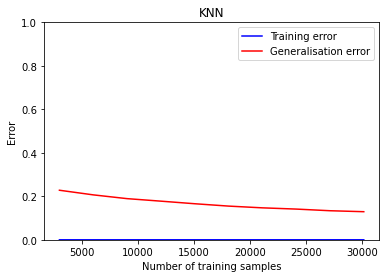

In [49]:
run_evaluate_model(knn_gs, X_train, y_train, X_test, y_test, model_name = 'KNN')

Logistic Regression Best parameters: {'C': 100, 'penalty': 'none'}
Logistic Regression Best score: 0.7659177970312536 

Logistic Regression Classification report: (0=income <=50K , 1=income > 50K):

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      6404
           1       0.77      0.77      0.77      6513

    accuracy                           0.77     12917
   macro avg       0.77      0.77      0.77     12917
weighted avg       0.77      0.77      0.77     12917

Logistic Regression Accuracy score: 76.759
Logistic Regression F1 Score:  77.014
Logistic Regression RunningTime: 0.09s



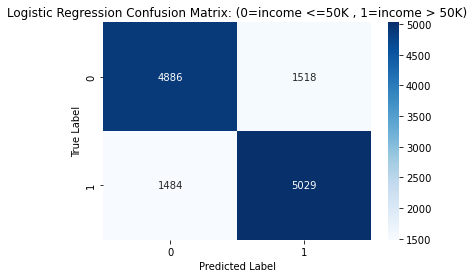

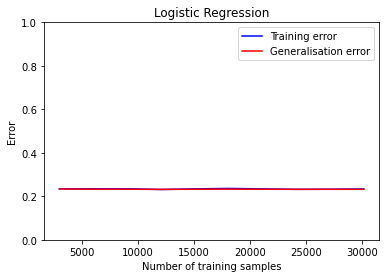

In [50]:
run_evaluate_model(lr_gs, X_train, y_train, X_test, y_test, model_name = 'Logistic Regression')

Random Forest Best parameters: {'max_depth': 174, 'n_estimators': 132}
Random Forest Best score: 0.9129034033863761 

Random Forest Classification report: (0=income <=50K , 1=income > 50K):

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      6404
           1       0.89      0.97      0.93      6513

    accuracy                           0.92     12917
   macro avg       0.93      0.92      0.92     12917
weighted avg       0.93      0.92      0.92     12917

Random Forest Accuracy score: 92.421
Random Forest F1 Score:  92.812
Random Forest RunningTime: 2.97s



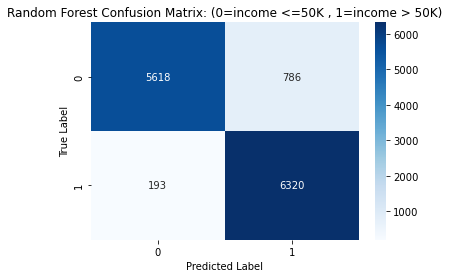

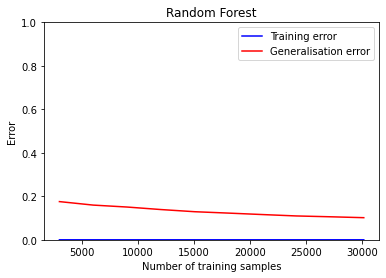

In [51]:
run_evaluate_model(rf_gs, X_train, y_train, X_test, y_test, model_name = 'Random Forest')

# 7. Comparing Models using ROC_AUC_CURVE

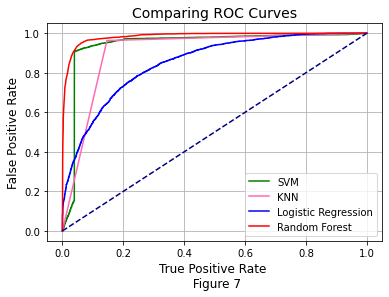

In [52]:
# Plot ROC Curve for the each model
from sklearn.metrics import roc_auc_score, roc_curve
svm = SVC(C=100, gamma =100, probability = True)
svm.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors = 1, p=2)
knn.fit(X_train, y_train)

lr=LogisticRegression(C=100, penalty = 'l2')
lr.fit(X_train, y_train)

rf = RandomForestClassifier(max_depth=115, n_estimators=124)
rf.fit(X_train, y_train)

clf = [svm, knn, lr, rf]
clf_names=['SVM','KNN','Logistic Regression','Random Forest']

#Calculate the predict probabilities and plot roc_curve for each model
color = ['green','hotpink', 'blue', 'red']
i = 1
for i, clf in enumerate(clf) :
    predict_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, predict_prob)
    plt.plot(fpr, tpr, color = color[i])
    plt.legend(clf_names, loc = 'lower right', frameon = True)

plt.title("Comparing ROC Curves", fontsize = 14)
plt.xlabel("True Positive Rate \n Figure 7", fontsize = 12)
plt.ylabel("False Positive Rate", fontsize = 12)
plt.plot([0,1],[0,1], linestyle = '--',  color = 'navy')
plt.grid(b=None)
plt.show()

# 8. Statistical Significance

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv_method_ttest = StratifiedKFold(n_splits=10, shuffle=True, random_state=111)
cv_results_SVM = cross_val_score(estimator=svm,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                scoring='f1')
cv_results_SVM.mean()

0.820020954267296

In [54]:
cv_results_RF = cross_val_score(estimator=rf,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                scoring='f1')
cv_results_RF.mean()

0.8808204020184203

In [55]:
cv_results_KNN = cross_val_score(estimator=knn,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                scoring='f1')
cv_results_KNN.mean()

0.8528743570002242

In [56]:
cv_results_LR = cross_val_score(estimator=lr,
                                X=X_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                scoring='f1')
cv_results_LR.mean()

0.7704734033530105

In [57]:
from scipy.stats import ttest_rel

print(ttest_rel(cv_results_SVM, cv_results_RF))

Ttest_relResult(statistic=-29.38950156631966, pvalue=2.9834785036558245e-10)


In [58]:
from scipy.stats import ttest_rel

print(ttest_rel(cv_results_KNN, cv_results_RF))

Ttest_relResult(statistic=-15.332641541982216, pvalue=9.322958639476569e-08)


In [59]:
from scipy.stats import ttest_rel

print(ttest_rel(cv_results_LR, cv_results_RF))

Ttest_relResult(statistic=-37.44069359787509, pvalue=3.430876957810112e-11)
